# read data

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

bmw_data = pd.read_json('Trips-Output.json')

# end_soc_kwh = state of charge (soc) in kilowatt / hour (kwh) at the end of the trip (end)
# end_soc_perc = soc in percent (perc) at the end
# end_time = unix time (time) at the end
# end_x_ind = x coordinate of the vehicle as an ind (x_ind) at the end
# end_y_ind = y coordinate of the vehicle as an ind (y_ind) at the end
# start_soc_kwh = soc in kwh at the start of the trip (start)
# start_soc_perc = soc in perc at the start
# start_time = time at the start
# start_x_ind = x_ind at the start
# start_y_ind = y_ind at the start
# vehicle_type = indicator if a vehicle is either a plug-in hybrid electric vehicle (PHEV) or a battery electric vehicle (BEV)
# vin = vehicle identification number

In [77]:
df = pd.DataFrame(columns=['charging_station_loc', 'parking_time'])
for i in range(bmw_data['vin'].max()+1):
    
    #take data of each vehicle and sort them by start_time
    vin_data=bmw_data[bmw_data['vin']==i].sort_values(by='start_time')
  
    length=len(vin_data)
    pehv_total_charge_increased = 0
    bev_total_charge_increased = 0
    pehv_total_time = 0
    bev_total_time = 0
    count=0;
   
    for index, row in vin_data.head(length).iterrows():
        
        #count is set to 0 initially, when the first row is encountered do no comparison, 
        # just save this row to prev_row
        if count==0:
            prev_row = row
            count=1
        
        #if current rows start location is same as prev_row's end location and the charging percentage is increased
        # in the current row data, that means there was a charging session
        else:
            if(row['start_x_ind'] == prev_row['end_x_ind'] and row['start_y_ind'] == prev_row['end_y_ind'] 
               and row['start_soc_kwh'] > prev_row['end_soc_kwh']):
#                 print(row['start_x_ind'], row['start_y_ind'], row['start_time'] - prev_row['end_time'], 
#                       row['start_soc_kwh'] - prev_row['end_soc_kwh'], "kwh,",
#                       row['start_soc_perc'] - prev_row['end_soc_perc'], "%,",
#                       row['vehicle_type'] )
                
                charging_station_loc = str(row['start_x_ind'])+','+ str(row['start_y_ind'])
                parking_time = (row['start_time'] - prev_row['end_time']).total_seconds() / 3600                                                        
                new_row = pd.DataFrame([[charging_station_loc, parking_time]], columns=['charging_station_loc', 'parking_time'])
                df = df.append(new_row, ignore_index=True)
                prev_row = row
print(df)

   charging_station_loc  parking_time
0                218,94     66.159444
1                  0,72      0.595556
2                55,498      2.317500
3                 23,22      1.021111
4                24,322      0.050278
5                394,56      5.409167
6             3723,4329      0.118889
7                95,315      6.976944
8               17,2642    185.928056
9              200,1546    244.675556
10              263,786    527.074444
11               24,403   1821.736944
12              151,174    304.017222
13            1335,1092      7.202500
14               95,398      7.579444
15             4106,393   4251.160000
16              834,931    646.934444
17               51,106   3840.471944
18              495,214   1862.400000
19              495,214   1283.065833
20             1384,210   1533.262222
21              495,214   1028.150278
22              478,515     21.852222
23              285,346     22.712500
24            2544,1809      0.461111
25          

   charging_station_loc  avg_parking_time
0                  0,72          0.595556
1             1335,1092          7.202500
2              1384,210       1533.262222
3               151,174        304.017222
4               17,2642        185.928056
5               188,358       1717.539028
6               197,474       3097.571389
7              200,1546        244.675556
8                218,94         66.159444
9                 23,22          1.021111
10               23,396       1848.987500
11               24,322          0.050278
12               24,403       1821.736944
13                25,21        335.097222
14            2544,1809          0.461111
15              263,786        527.074444
16              285,346         22.712500
17               293,56       1914.143889
18              293,572          3.682500
19               364,22       4151.137778
20            3723,4329          0.118889
21               39,340         44.711111
22               394,56          5

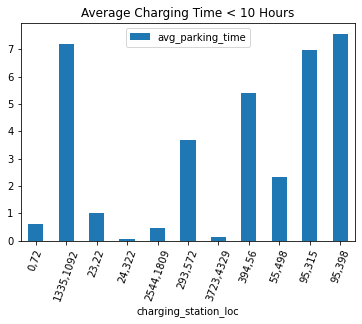

In [78]:
dfg=df.groupby('charging_station_loc').parking_time.mean().reset_index()
#plot the charging stations and their average charging times
#df.groupby('charging_station_loc').parking_time.mean().plot(kind = "bar")
dfg = dfg.rename(columns={'parking_time': 'avg_parking_time'})
print(dfg)
plot=dfg[dfg['avg_parking_time']<10.0].plot.bar(x='charging_station_loc', y='avg_parking_time', 
                                           title='Average Charging Time < 10 Hours', rot=70)
fig = plot.get_figure()
fig.savefig("Average Charging Time < 10 Hours.png")

In [79]:
dfg.avg_parking_time = dfg.avg_parking_time/24.0
print(dfg)

# dfg

   charging_station_loc  avg_parking_time
0                  0,72          0.024815
1             1335,1092          0.300104
2              1384,210         63.885926
3               151,174         12.667384
4               17,2642          7.747002
5               188,358         71.564126
6               197,474        129.065475
7              200,1546         10.194815
8                218,94          2.756644
9                 23,22          0.042546
10               23,396         77.041146
11               24,322          0.002095
12               24,403         75.905706
13                25,21         13.962384
14            2544,1809          0.019213
15              263,786         21.961435
16              285,346          0.946354
17               293,56         79.755995
18              293,572          0.153438
19               364,22        172.964074
20            3723,4329          0.004954
21               39,340          1.862963
22               394,56          0

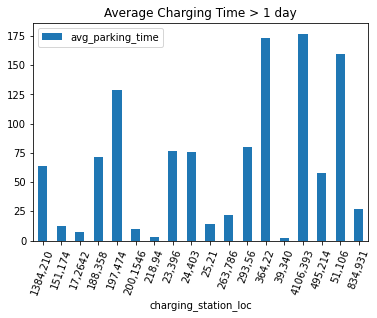

In [80]:
plot=dfg[dfg['avg_parking_time']>=1.0].plot.bar(x='charging_station_loc', y='avg_parking_time', 
                                           title='Average Charging Time > 1 day', rot=70)
fig = plot.get_figure()
fig.savefig("Average Charging Time > 1 day.png")